In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("D:/DataScience/Edwisor/Edwisor/Edwisor/MyProjects/Project2/credit-card-data.csv")

In [4]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [5]:
df.drop('CUST_ID', axis=1, inplace=True)

In [6]:
df.shape

(8950, 17)

In [7]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In [8]:
import seaborn as sns

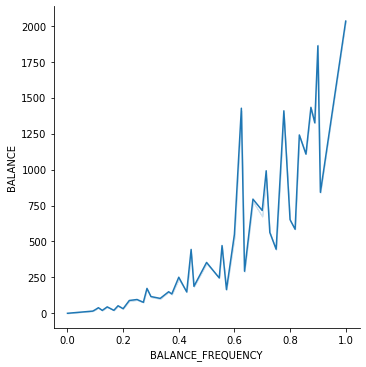

In [9]:
sns.relplot(x='BALANCE_FREQUENCY', y='BALANCE', kind= 'line', data=df, ci= False)

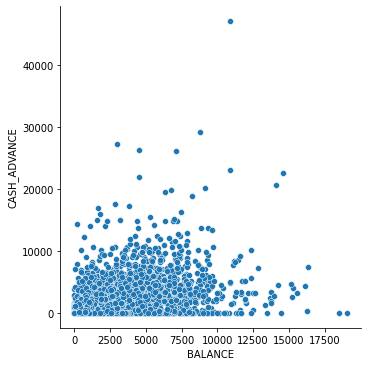

In [10]:
sns.relplot(x='BALANCE', y='CASH_ADVANCE', data=df, ci= False)

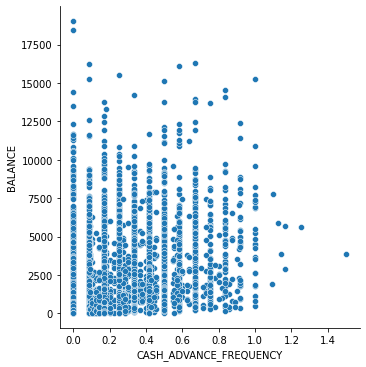

In [11]:
sns.relplot(x='CASH_ADVANCE_FREQUENCY', y='BALANCE', data=df, ci= False)

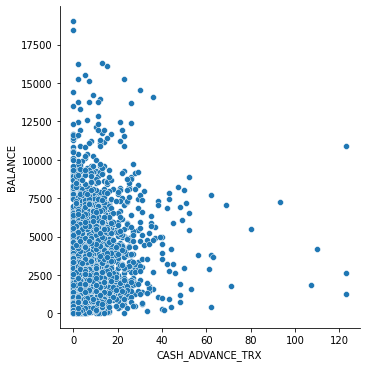

In [12]:
sns.relplot(x='CASH_ADVANCE_TRX', y='BALANCE', data=df, ci= False)

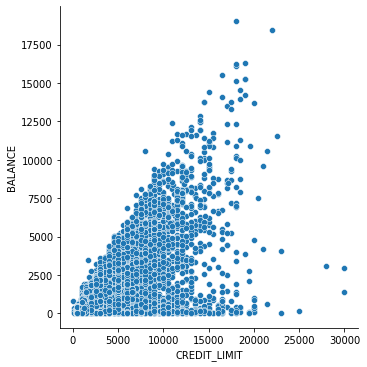

In [13]:
sns.relplot(x='CREDIT_LIMIT', y='BALANCE', data=df, ci= False)

In [14]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [16]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot:>

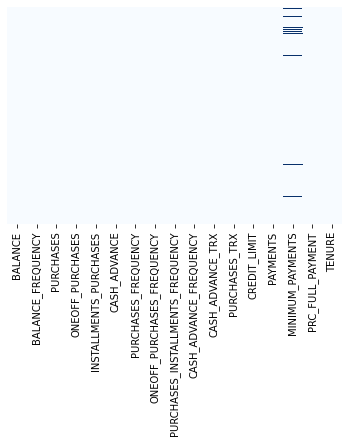

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='Blues',cbar=False)

In [18]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [19]:
# Imputing the missing elements with the mean 
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [20]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [21]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
n= len(df.columns)
n

17

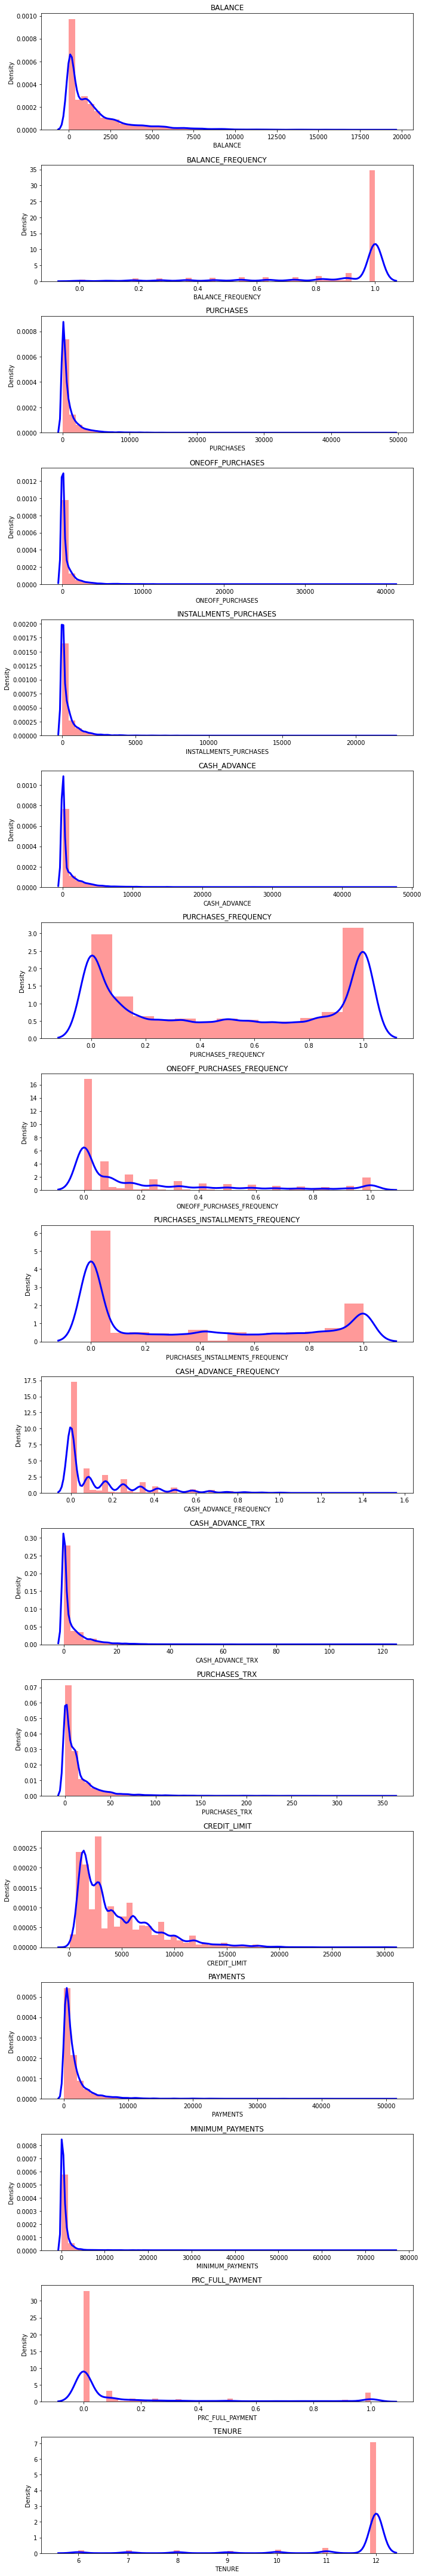

In [23]:
#Using Kernel Density Estimator (KDE) plots to visualize the probablility of the continuous variable features
plt.figure(figsize=(10,60))
for i in range(n):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'r'})
    plt.title(df.columns[i])
plt.tight_layout()

In [24]:
correlations = df.corr()

<AxesSubplot:>

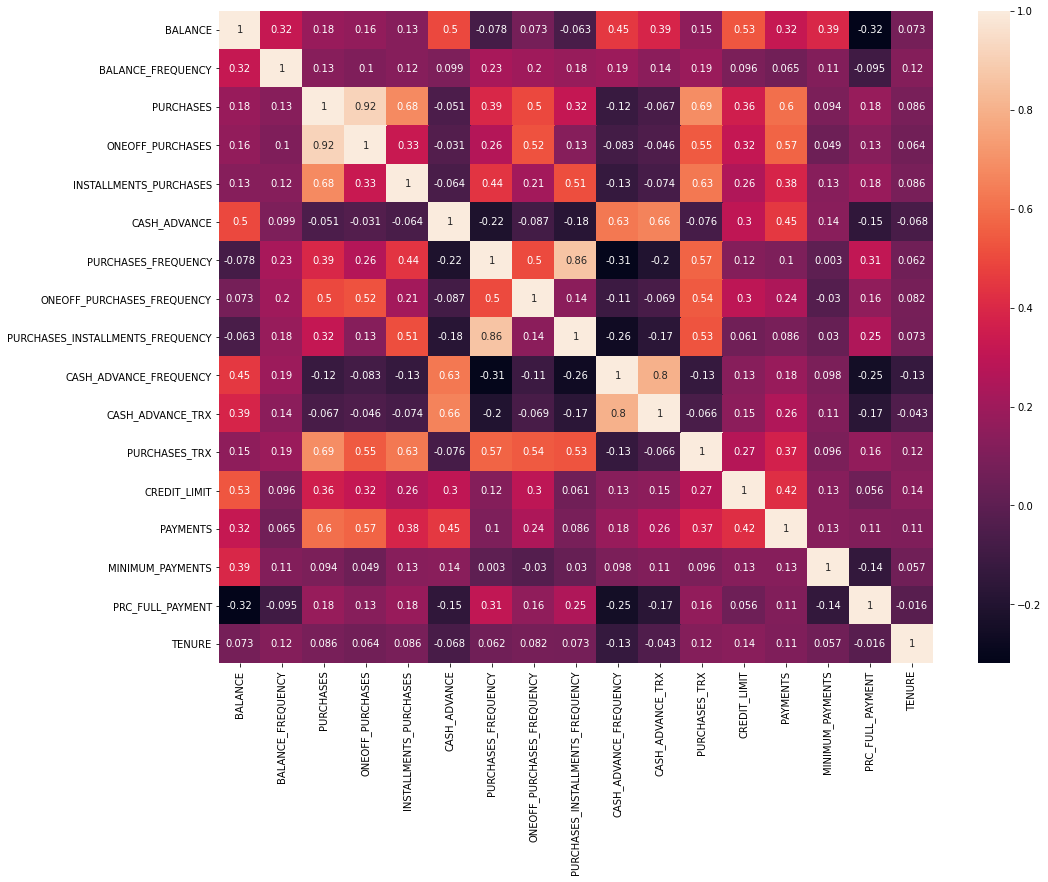

In [25]:
plt.figure(figsize=(16,12))
sns.heatmap(correlations,annot=True)

In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data.shape

(8950, 17)

In [27]:
df_scaled= pd.DataFrame(scaled_data)

In [28]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.089310,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,0.000000,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,-0.525551,0.36068


In [29]:
from sklearn.cluster import KMeans

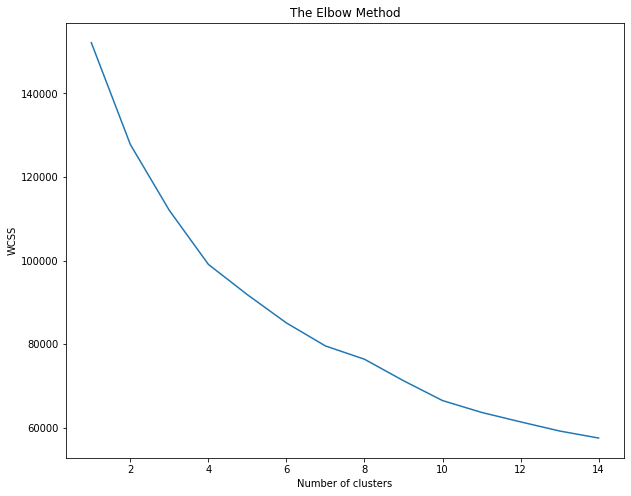

In [30]:
wcss = []

for i in range(1, 15):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(df_scaled)
    
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

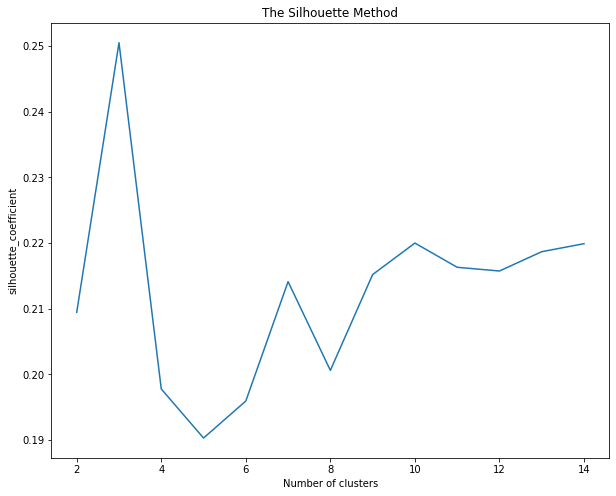

In [32]:
#optimum number of clusters using elbow curve
from sklearn.cluster import KMeans

silhouette_coefficients = []

for i in range(2, 15):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(df_scaled)
    
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 15), silhouette_coefficients)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficient')
plt.show()

In [33]:
#From Sihouette coefficent it looks like the optimal number of clusters is Three (3)

In [34]:
kmeans= KMeans(n_clusters= 3, init= 'k-means++')
kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [35]:
kmeans.n_iter_

10

In [36]:
pred = kmeans.predict(df_scaled)

In [52]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [53]:
pred

array([0, 2, 0, ..., 0, 0, 0])

In [37]:
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    6120
2    1599
1    1231
Name: cluster, dtype: int64

In [38]:
from sklearn.manifold import TSNE

In [39]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(frame)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.093s...
[t-SNE] Computed neighbors for 8950 samples in 0.906s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 85.050267
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.025665
[t-SNE] KL divergence after 1000 iterations: 1.233604


In [40]:
#from bioinfokit.visuz import cluster
#cluster.tsneplot(score=tsne_em)

In [41]:
#color_class = frame['cluster'].to_numpy()
#cluster.tsneplot(score=tsne_em, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1) )

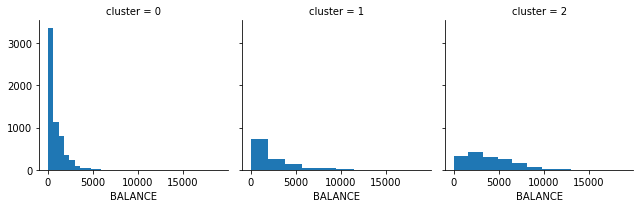

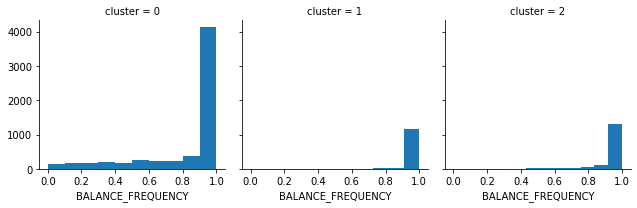

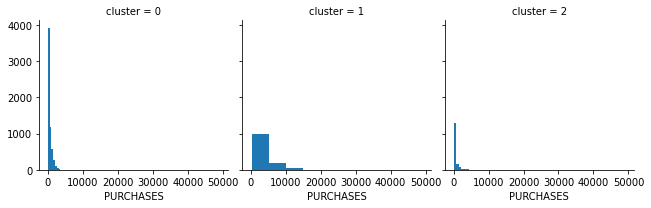

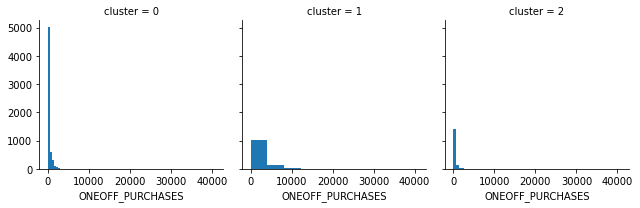

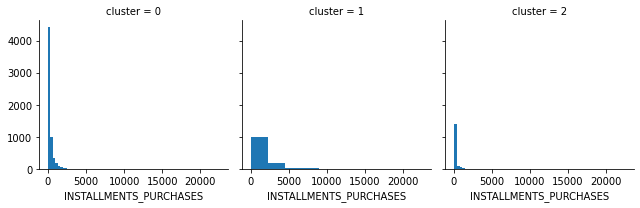

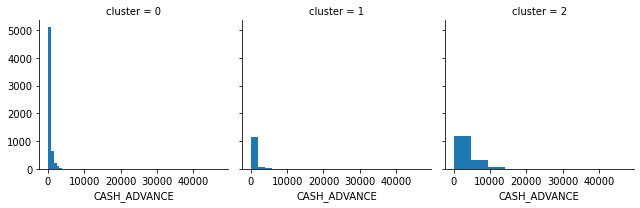

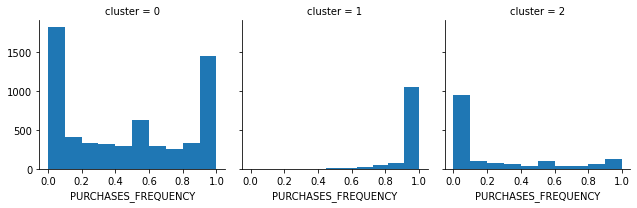

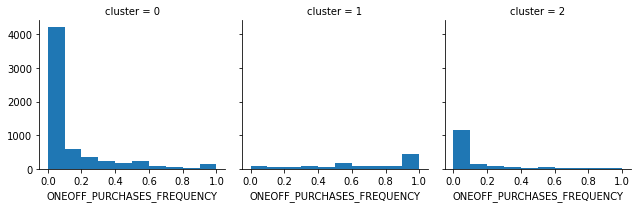

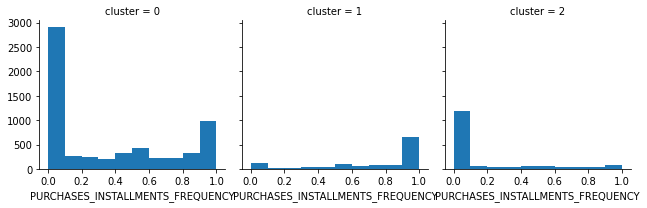

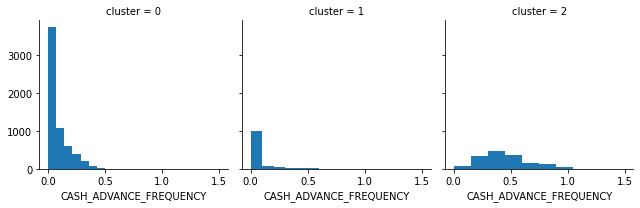

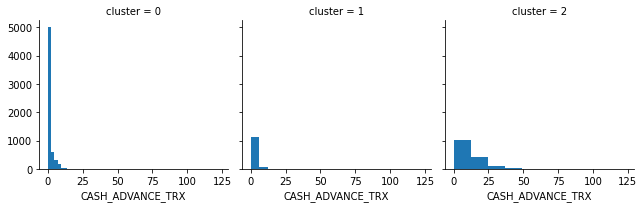

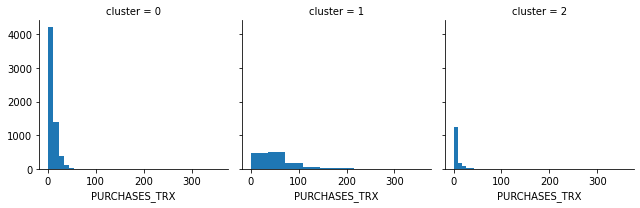

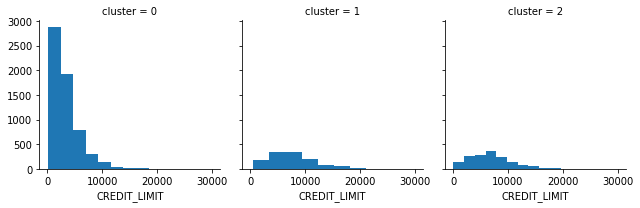

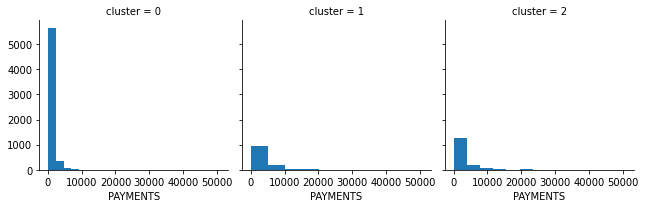

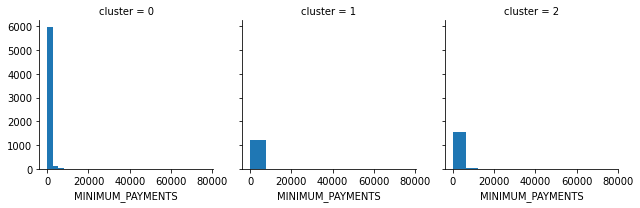

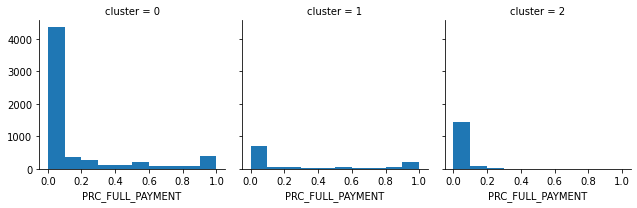

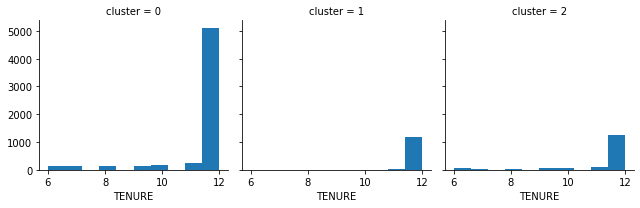

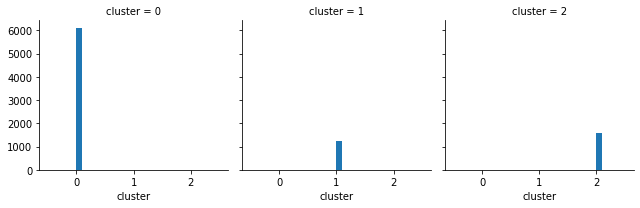

In [42]:
for f in frame:
    grid= sns.FacetGrid(frame, col='cluster')
    grid.map(plt.hist, f)

In [44]:
df_scaled.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [45]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp_new = pca.fit_transform(df)
principal_comp_new

array([[-4326.3839861 ,   921.56686797],
       [ 4118.91681806, -2432.84648302],
       [ 1497.90760925, -1997.57858814],
       ...,
       [-4379.44423209,   911.50455141],
       [-4791.11777187,  1032.54091813],
       [-3623.70278395,  1555.13476353]])

In [55]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_comp_new,columns=['pca1','pca2'])
pca_df.sample(5)

,pca1,pca2
2450,-1825.260067,-945.345559
1729,514.032497,3069.160959
2732,-1836.199226,2991.742509
8850,-3702.974000,1675.072214
4012,4960.354410,2381.621974


In [57]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':pred})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-4326.383986,921.566868,0
1,4118.916818,-2432.846483,2
2,1497.907609,-1997.578588,0
3,1394.548502,-1488.743339,0
4,-3743.351904,757.342642,0


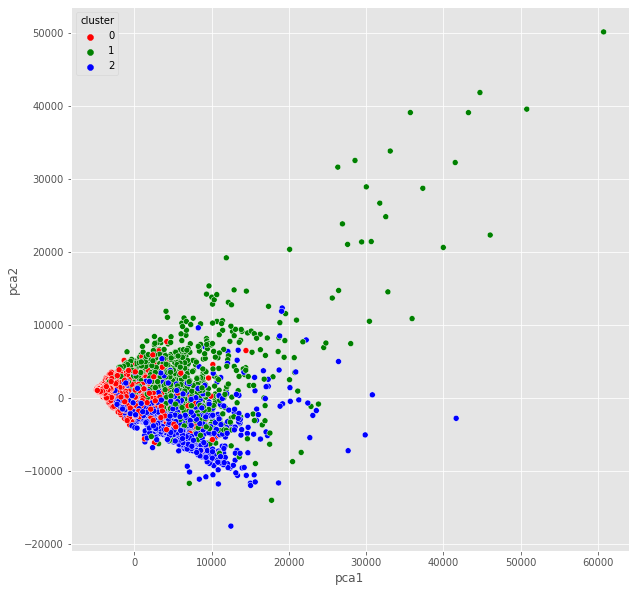

In [58]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue'])
plt.show()

### Method-2 : Reducing the dimensionality of data and then applying K-means

In [59]:
pca=PCA(n_components=8)

In [60]:
df1= pd.DataFrame(data= df_scaled)

In [61]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.089310,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,0.000000,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,-0.525551,0.36068


In [62]:
pca.fit(df1)

PCA(n_components=8)

In [63]:
df_pca=pca.transform(df1)

In [64]:
explained_variance = pca.explained_variance_ratio_

In [65]:
explained_variance

array([0.27290037, 0.20301991, 0.08791979, 0.07479975, 0.06262792,
       0.05750211, 0.04887235, 0.04257486])

In [66]:
df_pca

array([[-1.68222026, -1.07645061,  0.48850652, ...,  0.05062893,
         0.82914441, -0.03930321],
       [-1.1382949 ,  2.50647666,  0.60121233, ..., -1.13684066,
        -0.37450703,  0.1324107 ],
       [ 0.96968401, -0.3835203 ,  0.10237138, ..., -0.21722246,
        -1.57325769, -0.16954839],
       ...,
       [-0.92620364, -1.8107856 , -0.47472306, ...,  2.97694806,
        -1.36982289, -0.3459341 ],
       [-2.33655167, -0.65796601,  0.97472512, ...,  3.17438039,
        -0.9305112 ,  0.14807661],
       [-0.55642216, -0.40046712,  1.01519557, ...,  3.75329147,
        -1.4140955 , -0.37647329]])

In [67]:
df2= pd.DataFrame(df_pca)

In [68]:
df2

,0,1,2,3,4,5,6,7
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,-0.169548
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,-0.559099
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0.208399
...,...,...,...,...,...,...,...,...
8945,-0.359629,-2.016145,-0.995355,-2.727433,0.268860,2.673305,-1.523465,0.201213
8946,-0.564369,-1.639123,-1.290238,-1.860551,0.187104,3.384215,-1.083192,-0.554112
8947,-0.926204,-1.810786,-0.474723,-2.280239,0.386553,2.976948,-1.369823,-0.345934
8948,-2.336552,-0.657966,0.974725,-1.861279,0.069779,3.174380,-0.930511,0.148077


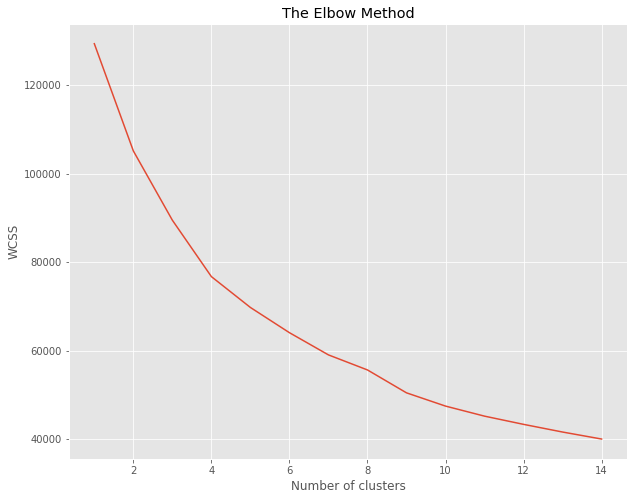

In [69]:
#optimum number of clusters using elbow curve
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 15):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(df2)
    
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

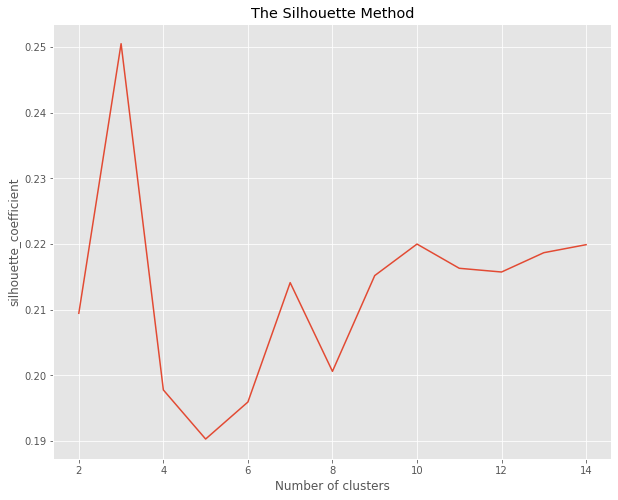

In [70]:
#optimum number of clusters using elbow curve
from sklearn.cluster import KMeans

silhouette_coefficients = []

for i in range(2, 15):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(df_scaled)
    
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 15), silhouette_coefficients)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficient')
plt.show()

In [71]:
kmeans= KMeans(n_clusters= 3, init= 'k-means++')
kmeans.fit(df2)

KMeans(n_clusters=3)

In [73]:
pred1 = kmeans.predict(df2)

In [74]:
frame1 = pd.DataFrame(df2)
frame1['cluster'] = pred1
frame1['cluster'].value_counts()

1    6106
0    1554
2    1290
Name: cluster, dtype: int64

In [75]:
tsne_em1 = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(frame1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.679s...
[t-SNE] Computed neighbors for 8950 samples in 0.666s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.329210
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.416008
[t-SNE] KL divergence after 1000 iterations: 1.304868


In [76]:
frame1.head()

,0,1,2,3,4,5,6,7,cluster
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303,1
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411,0
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,-0.169548,1
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,-0.559099,1
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0.208399,1


In [77]:
color_class = frame1['cluster'].to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1) )

In [78]:
#Again applying PCA for visualisation

In [109]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp_new = pca.fit_transform(df2)
principal_comp_new

array([[-1.57596519, -1.22379187],
       [-1.44598121,  2.50998984],
       [ 0.99401451, -0.30455979],
       ...,
       [-0.79061125, -1.86349049],
       [-2.25197697, -0.86737649],
       [-0.51254436, -0.45502979]])

In [110]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_comp_new,columns=['pca1','pca2'])
pca_df.sample(5)

,pca1,pca2
6527,0.483437,-2.242595
1532,3.257709,2.743981
7331,0.710147,-1.535119
1251,-1.720654,-0.710066
8541,7.332936,0.101159


In [111]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':pred1})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.575965,-1.223792,1
1,-1.445981,2.509990,0
2,0.994015,-0.304560,1
3,-0.851451,-0.053225,1
4,-1.519181,-0.836561,1


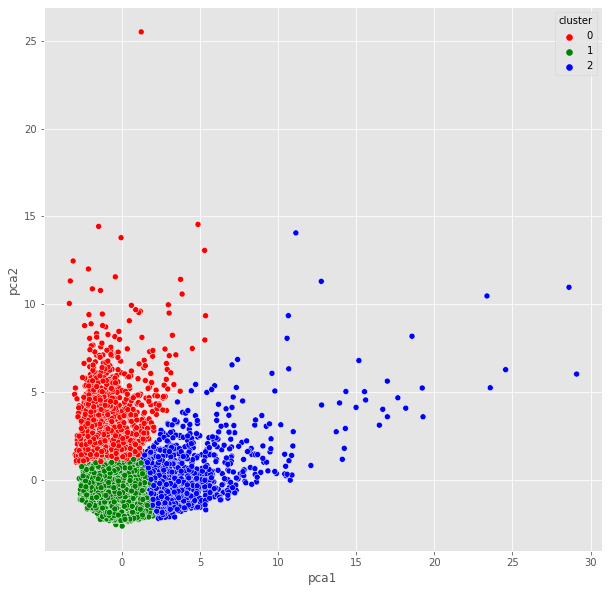

In [82]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue'])
plt.show()

### Using Gaussian Mixture Clustering Algorithm

In [96]:
from sklearn.mixture import GaussianMixture 

In [97]:
gmm = GaussianMixture(n_components = 3) 

In [98]:
gmm.fit(df_scaled)

GaussianMixture(n_components=3)

In [99]:
c = GaussianMixture(n_components = 3).fit_predict(df_scaled)

In [100]:
c

array([2, 0, 2, ..., 2, 0, 1], dtype=int64)

In [101]:
Gauss_df = pd.concat([df_scaled, pd.DataFrame({'cluster':c})], axis = 1)

In [102]:
Gauss_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,-0.525551,0.360680,2
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.089310,0.234227,0.360680,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,-0.525551,0.360680,2
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,0.000000,-0.525551,0.360680,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,-0.525551,0.360680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-0.349854,1.183951,-4.122768,2
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,0.000000,-0.525551,-4.122768,2
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-0.335465,0.329200,-4.122768,2
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-0.346906,0.329200,-4.122768,0


In [103]:
tsne_em2 = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(Gauss_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.054s...
[t-SNE] Computed neighbors for 8950 samples in 1.952s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.443021
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.767731
[t-SNE] KL divergence after 1000 iterations: 1.428730


In [104]:
color_class = Gauss_df['cluster'].to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1) )

In [105]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp_new = pca.fit_transform(Gauss_df)
principal_comp_new

array([[-1.33491992, -1.50639371],
       [-1.65375356,  2.45677444],
       [ 1.17429748, -0.4153962 ],
       ...,
       [-0.47740188, -2.12294036],
       [-2.42995379, -0.73738319],
       [-0.526537  , -0.42825217]])

In [106]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_comp_new,columns=['pca1','pca2'])
pca_df.sample(5)

,pca1,pca2
7808,-1.497718,2.036302
8813,-2.221772,2.058221
5754,-0.967007,5.448516
6185,0.477002,-1.072707
8584,-0.905365,2.629436


In [107]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':c})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.334920,-1.506394,2
1,-1.653754,2.456774,0
2,1.174297,-0.415396,2
3,-0.898226,-0.048869,1
4,-1.709872,-0.636278,0


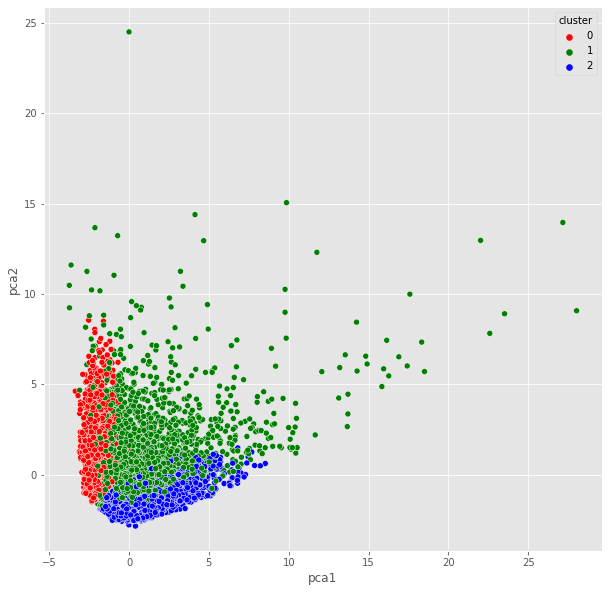

In [108]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue'])
plt.show()

#### Gaussian Clustering on data which has been reduced in dimensions through PCA

In [112]:
gmm1 = GaussianMixture(n_components = 3) 

In [115]:
df2.drop(['cluster'], axis=1, inplace= True)

In [117]:
df2.head()

,0,1,2,3,4,5,6,7
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,-0.169548
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,-0.559099
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0.208399


In [118]:
gmm.fit(df2)

GaussianMixture(n_components=3)

In [119]:
c1 = GaussianMixture(n_components = 3).fit_predict(df2)

In [120]:
c1

array([1, 0, 2, ..., 1, 1, 1], dtype=int64)

In [121]:
Gauss_df = pd.concat([df2, pd.DataFrame({'cluster':c1})], axis = 1)

In [122]:
Gauss_df

,0,1,2,3,4,5,6,7,cluster
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303,1
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411,0
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,-0.169548,2
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,-0.559099,1
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0.208399,2
...,...,...,...,...,...,...,...,...,...
8945,-0.359629,-2.016145,-0.995355,-2.727433,0.268860,2.673305,-1.523465,0.201213,1
8946,-0.564369,-1.639123,-1.290238,-1.860551,0.187104,3.384215,-1.083192,-0.554112,1
8947,-0.926204,-1.810786,-0.474723,-2.280239,0.386553,2.976948,-1.369823,-0.345934,1
8948,-2.336552,-0.657966,0.974725,-1.861279,0.069779,3.174380,-0.930511,0.148077,1


In [123]:
tsne_em2 = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(Gauss_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.027s...
[t-SNE] Computed neighbors for 8950 samples in 0.611s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.334235
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.426826
[t-SNE] KL divergence after 1000 iterations: 1.234495


In [124]:
color_class = Gauss_df['cluster'].to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1) )

In [125]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp_new = pca.fit_transform(Gauss_df)
principal_comp_new

array([[-1.65953584, -1.0237966 ],
       [-0.88303119,  2.60112964],
       [ 0.80931759, -0.46081158],
       ...,
       [-0.88071784, -1.75357884],
       [-2.24810658, -0.56220756],
       [-0.49233858, -0.35650878]])

In [126]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_comp_new,columns=['pca1','pca2'])
pca_df.sample(5)

,pca1,pca2
8548,0.998656,-0.272136
7037,-0.382063,-2.018586
5131,-0.803158,-1.609370
5823,-1.069337,2.423837
6244,-1.542258,2.848200


In [127]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':c1})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.659536,-1.023797,1
1,-0.883031,2.601130,0
2,0.809318,-0.460812,2
3,-0.828916,0.078349,1
4,-1.728764,-0.693609,2


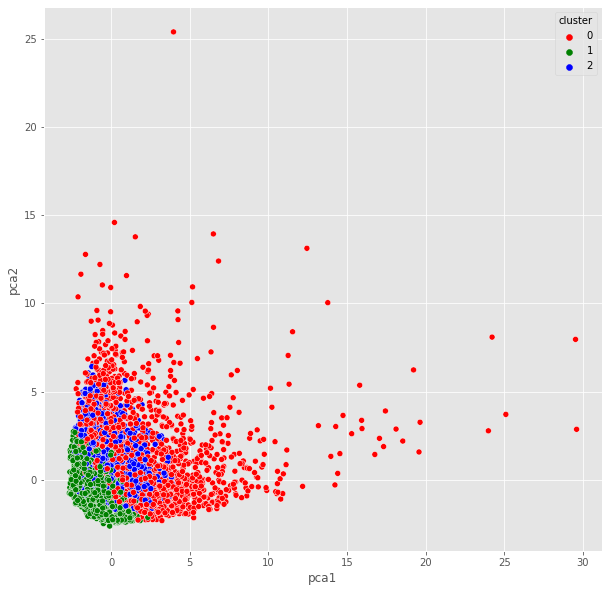

In [128]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue'])
plt.show()